In [5]:
import os, sys
from pathlib import Path

src_path = Path(os.getcwd()).resolve().parents[1]  
sys.path.append(str(src_path))

print(sys.path[-1])  
import os
print(os.getcwd())

C:\RAG_COMMANDER\src
c:\RAG_COMMANDER\src\agents\main


In [ ]:
# %%writefile main_agent.py
# from langgraph.graph.state import Command, Literal
# from agents.state.start_state import StartConfirmation, StartInput
# from agents.state.main_state import MainState
# from utils.llm import LLMProfile
# from utils.util import get_today_str
# from langchain_core.messages import HumanMessage, get_buffer_string, AIMessage
# from langgraph.graph import StateGraph, START, END
# from prompts import PromptManager, PromptType
# from agents.analysis.analysis_graph import analysis_graph
# from agents.jung_min_jae.jung_min_jae_agent import report_graph
# from copy import deepcopy

# start_llm = LLMProfile.chat_bot_llm()
# messages_key = MainState.KEY.messages
# start_input_key = MainState.KEY.start_input
# analysis_outputs_key = MainState.KEY.analysis_outputs
# status_key = MainState.KEY.status


# def start_confirmation(
#     state: MainState,
# ) -> Command[Literal["start", "__end__"]]:

#     parser_llm = start_llm.with_structured_output(StartConfirmation)
#     messages_str = get_buffer_string(messages=state[messages_key])

#     prompt = PromptManager(PromptType.MAIN_START_CONFIRMATION).get_prompt(
#         messages=messages_str
#     )
#     response: StartConfirmation = parser_llm.invoke([HumanMessage(content=prompt)])

#     if response.confirm == False:
#         return Command(
#             goto=END, update={messages_key: [AIMessage(content=response.question)]}
#         )
#     else:
#         return Command(
#             goto="start",
#             update={messages_key: [AIMessage(content=response.verification)]},
#         )


# def start(state: MainState) -> MainState:
#     parser_model = start_llm.with_structured_output(StartInput)
#     prompt = PromptManager(PromptType.MAIN_START).get_prompt(
#         messages=get_buffer_string(state[messages_key]), date=get_today_str()
#     )
#     response: StartInput = parser_model.invoke([HumanMessage(content=prompt)])
#     return {start_input_key: response.model_dump(), status_key: "ANALYSIS"}


# def analysis_graph_node(state: MainState) -> MainState:
#     result = analysis_graph.invoke({"start_input": deepcopy(state[start_input_key])})
#     return {
#         "analysis_outputs": result.get("analysis_outputs", {}),
#         status_key: "JUNG_MIN_JAE"
#     }


# def jung_min_jae_graph(state: MainState) -> MainState:
#     result = report_graph.invoke({"start_input": deepcopy(state[start_input_key]),
#                                   "analysis_outputs": deepcopy(state[analysis_outputs_key]),
#                                   "segment":1
#                                   })
#     return {
#         "final_report": result["final_report"],
#         status_key:"RENDERING"
#     }


# graph_builder = StateGraph(MainState)

# start_confirmation_key = "start_confirmation"
# start_key = "start"
# analysis_graph_key = "analysis_graph"
# jung_min_jae_key = "jung_min_jae_graph"

# graph_builder.add_node(start_confirmation_key, start_confirmation)
# graph_builder.add_node(start_key, start)
# graph_builder.add_node(analysis_graph_key, analysis_graph_node)
# graph_builder.add_node(jung_min_jae_key, jung_min_jae_graph)

# graph_builder.add_edge(START, start_confirmation_key)
# graph_builder.add_edge(start_key, analysis_graph_key)
# graph_builder.add_edge(analysis_graph_key, jung_min_jae_key)
# graph_builder.add_edge(analysis_graph_key, END)


Overwriting main_agenttt.py


c:\PythonProject\RAG_COMMANDER\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


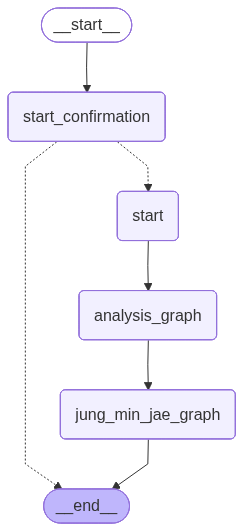

In [6]:
from main_agent import graph_builder
graph = graph_builder.compile()
graph

In [7]:
from utils.format_message import format_message
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import InMemorySaver
from agents.state.main_state import MainState
messages_key = MainState.KEY.messages
checkpointer = InMemorySaver()
graph = graph_builder.compile(checkpointer = checkpointer)

thread = {"configurable": {"thread_id":"1"}}
result = graph.invoke(
    {
        messages_key : [HumanMessage(content = "경기도 분당구 정자동 백현로 206 근처를 분석하고 싶고 규모는 대단지, 세대수는 1000세대 정도 생각합니다. ")]
    },
    config = thread
)

format_message(result[messages_key])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ 경기도 분당구 정자동 백현로 206 근처를 분석하고 싶고 규모는 대단지, 세대수는 1000세대 정도 생각합니다.          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ 제공해주신 정보(경기도 분당구 정자동 백현로 206 근처, 대단지, 약 1000세대 규모)를 바탕으로 보고서 작성을        │
│ 시작하겠습니다. 요청하신 위치와 단지 규모, 세대수가 명확히 확인되었습니다. 지금부터 부동산 대행사 사내용        │
│ 보고서를 준비하겠습니다.                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [8]:
result

{'messages': [HumanMessage(content='경기도 분당구 정자동 백현로 206 근처를 분석하고 싶고 규모는 대단지, 세대수는 1000세대 정도 생각합니다. ', additional_kwargs={}, response_metadata={}, id='7359b0cf-c0f0-4b8b-a804-43d52e243d0b'),
  AIMessage(content='제공해주신 정보(경기도 분당구 정자동 백현로 206 근처, 대단지, 약 1000세대 규모)를 바탕으로 보고서 작성을 시작하겠습니다. 요청하신 위치와 단지 규모, 세대수가 명확히 확인되었습니다. 지금부터 부동산 대행사 사내용 보고서를 준비하겠습니다.', additional_kwargs={}, response_metadata={}, id='94beaa5d-c6ca-409a-92d5-72b5ffd59a02')],
 'start_input': {'target_area': '경기도 분당구 정자동 백현로 206 근처',
  'scale': '대단지',
  'total_units': 1000,
  'units_by_type': None,
  'brand': None,
  'orientation': None,
  'parking_ratio': None,
  'terrain_condition': None,
  'gross_area': None,
  'floor_area_ratio_range': None,
  'building_coverage_ratio_range': None},
 'analysis_outputs': {'economic_insight': '대상지: 경기도 성남시 분당구 정자동 백현로 206 일대\n기준일(Asia/Seoul): 2025-10-27 / 2025-10-27T00:00:00+09:00\n\n1) 금리/신용여건\n- 한국은행 기준금리 레벨·결정 이력\n  - 2024-10, 2024-11: 연속 인하(세부 폭은 보도 기준) → 2025-01-16 3.00% 동결 → 2025-02-2

In [9]:
print(result['final_report'])

본 보고서는 부동산 마케팅 협회 리서치센터가 2025-10-27(Asia/Seoul) 기준으로 작성한 공식 분석 결과입니다. 대상: 경기도 성남시 분당구 정자동 백현로 206 인근, 대단지(예상 1,000세대).

Executive Summary — BLUF
- 결론: 현재 금리 하향 안정(한국은행 기준금리 2.50%, 2025-10-23 동결)과 정자동 핵심 생활권 특성(역·업무·학군·상권)이 맞물려, 적정 분양가를 준수하는 조건에서 초기 흡수력은 양호할 가능성이 높다. [ref: economic_insight, 2025-10]
- 권장 분양가(전용 84㎡ 가정): 평단 5,400만~5,900만/3.3㎡, 총액 약 13.8~15.1억(옵션·VAT 제외). 역세권·메이저 브랜드·대단지·우수 커뮤니티를 충족할 때 상단 접근이 가능, 비역세권·브랜드 미정 시 하단 또는 하단 이탈 검토가 필요하다. [ref: nearby_market, 2025-10]
- 가격 판단의 근거: 반경 1km 유사 연식·평형 구축 84㎡ 중위 평단 약 5,747만/3.3㎡(중위 총액 14.8억) 대비 ±10% 규칙을 적용하되, 브랜드·역세권·학군·사양 합산 보정 상한 +8% 내에서만 상단을 시도하는 것이 합리적이다. [ref: nearby_market, 2025-10]
- 핵심 리스크: 1) 대상지 좌표 미확정으로 교육·교통·편의의 실보행 지표 미확보, 2) 스트레스 DSR 3단계 및 수도권 대출 한도 강화로 체감 구매력 제약, 3) 2km·2년 내 신규 분양 벤치마크 부재, 4) 분양가상한제·규제지역 지정 여부 미확인에 따른 인허가·분양가 심사 리스크. [ref: economic_insight, 2025-10; location_insight, 2025-10; nearby_market, 2025-10]
- 기회 요인: 인근 구축 84㎡의 거래 체결이 14~15억대에서 꾸준히 확인되고(중위 14.8억), 생활권 내 신규 분양 희소성이 커 대체재 분산이 제한적이다. 상품성·입지 요건 충족 시